In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

R = 0.03
zLim = 500000

def getE(rho, z):

    Q = 2.2e11 * 1.6e-19 # C 
    eps0 = 8.8541878128e-12 # in SI units

    sigma =  306e-6 # m

    gamma = 7460.3 #Lorentz gamma factor for 7 TeV electrons

    sigma_z = 8.3e-2*gamma #m. Fixing by Lorentz factor, 
    #as sigma in laboratory system is 8.3 cm, in a system where the bunch is at rest, 
    #this value should be corrector by gamma factor because relativistic length change.

    Rin = np.sqrt(rho**2 + sigma*sigma/(sigma_z*sigma_z)*z**2)

    K = sigma/sigma_z * Q/(eps0*(2*np.pi)**1.5 * Rin**2)

    E = np.sqrt(np.pi/2)*special.erf(Rin/sigma/1.414213562) - Rin/sigma/np.exp(Rin**2/sigma/sigma/2)
    E = E*K

    E_rho = E*rho/Rin
    E_z   = E* z /Rin 

    return E_rho, E_z


In [4]:
z = np.linspace(-zLim, zLim, 2000)
rho = np.linspace(0, R, 1000)

Z, Rho = np.meshgrid(z, rho)

E_z_reqR = lambda z_arg: getE(R, z_arg)[1]

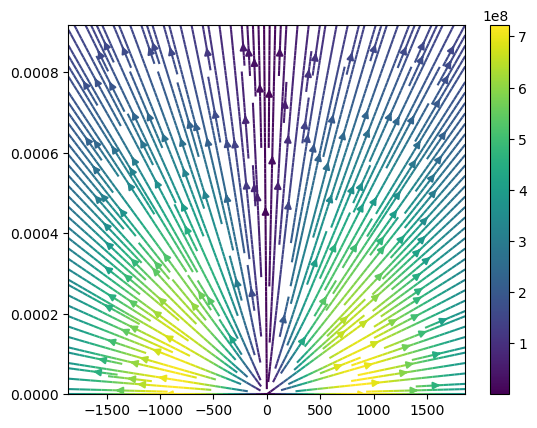

In [5]:
zLim_test = 8.3e-2*7460.3*3
R_test = 306e-6*3

z_test = np.linspace(-zLim_test, zLim_test, 2000)
rho_test = np.linspace(0, R_test, 1000)

Z_test, Rho_test = np.meshgrid(z_test, rho_test)

E_rho_test, E_z_test = getE(Rho_test, Z_test)
plt.streamplot(Z_test,Rho_test, E_z_test, E_rho_test, density=2.4, color = np.sqrt(E_rho_test**2+E_z_test**2))
plt.ylim(0, R_test)
plt.xlim(-zLim_test, zLim_test)
plt.colorbar()

/tmp/ipykernel_15830/346675848.py:26: RuntimeWarning: overflow encountered in exp
  E = np.sqrt(np.pi/2)*special.erf(Rin/sigma/1.414213562) - Rin/sigma/np.exp(Rin**2/sigma/sigma/2)


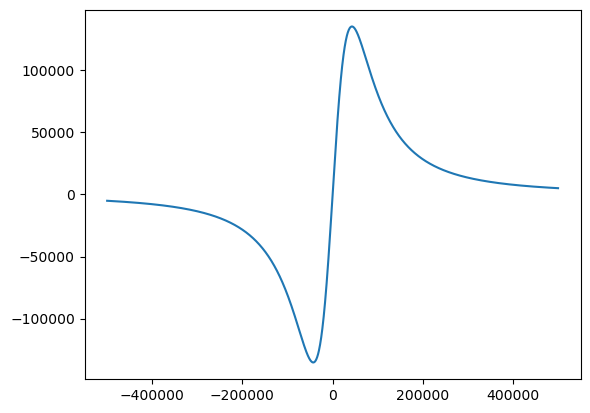

In [6]:
plt.plot(z, np.array([E_z_reqR(zi) for zi in z]))
plt.show()

In [7]:
def calc_Ez_reqR_Im(k_arg):

    return integrate.quad( lambda z_arg: np.sin(z_arg*k_arg) * E_z_reqR(z_arg) , 0, zLim, limit=150)[0] * 2/np.sqrt(2*np.pi)

k = np.linspace(0,0.001,2000)
Ez_Im = np.array([calc_Ez_reqR_Im(ik) for ik in k])

/tmp/ipykernel_15830/346675848.py:26: RuntimeWarning: overflow encountered in exp
  E = np.sqrt(np.pi/2)*special.erf(Rin/sigma/1.414213562) - Rin/sigma/np.exp(Rin**2/sigma/sigma/2)
/tmp/ipykernel_15830/955924550.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad( lambda z_arg: np.sin(z_arg*k_arg) * E_z_reqR(z_arg) , 0, zLim, limit=150)[0] * 2/np.sqrt(2*np.pi)


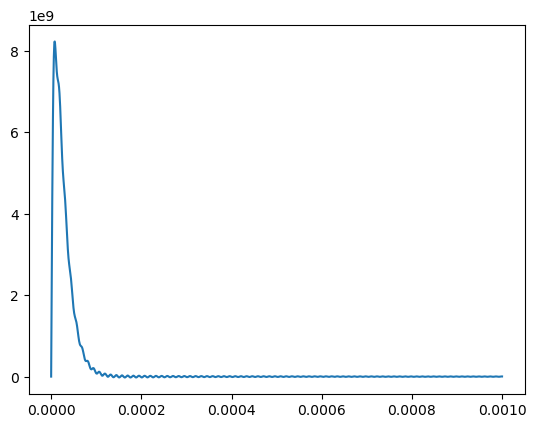

In [8]:
plt.plot(k, Ez_Im)
plt.show()

In [9]:
def calc_Ez_reqR(z_arg):

    return integrate.simps(Ez_Im*np.sin(k*z_arg), k) * 2/np.sqrt(2*np.pi) 

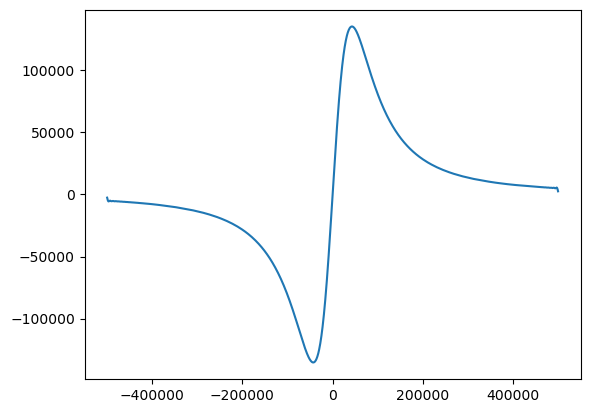

In [10]:
plt.plot(z, np.array([calc_Ez_reqR(zi) for zi in z]))
plt.show()

In [11]:
def calc_E_restored(rho_arg, z_arg):

    E_z = integrate.simps(Ez_Im*np.sin(k*z_arg) * special.i0(k*rho_arg)/special.i0(k*R), k) * 2/np.sqrt(2*np.pi) 
    E_rho = -integrate.simps(Ez_Im*np.cos(k*z_arg) * special.i1(k*rho_arg)/special.i0(k*R), k) * 2/np.sqrt(2*np.pi)

    return E_rho, E_z

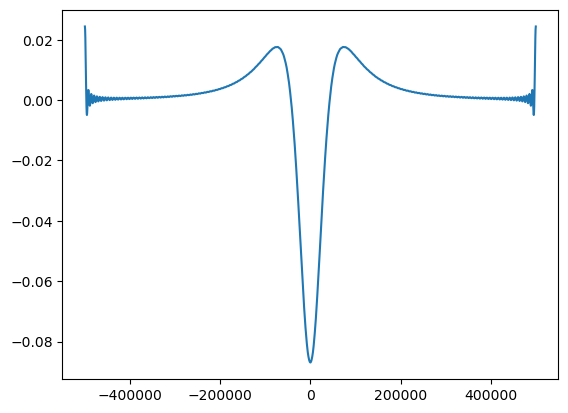

In [12]:
def calc_E_restored_reqR(z_arg):

    rho_arg = R

    E_rho = -integrate.simps(Ez_Im*np.cos(k*z_arg) * special.i1(k*rho_arg)/special.i0(k*R), k) * 2/np.sqrt(2*np.pi)

    return E_rho

plt.plot(z, np.array([calc_E_restored_reqR(zi) for zi in z]))
plt.show()

In [13]:
zLimRes = 83928.375
z_res = np.linspace(-zLimRes, zLimRes, 1000)
rho_res = np.linspace(0, R, 500)

Z_res, Rho_res = np.meshgrid(z_res, rho_res)

print("dr = ", Rho_res[1,0]-Rho_res[0,0])
print("dz = ", Z_res[0,1]-Z_res[0,0])

E_rho_rest = np.zeros(Z_res.shape)
E_z_rest = np.zeros(Z_res.shape)


dr =  6.012024048096192e-05
dz =  168.02477477477805


In [14]:


for i in range(Z_res.shape[0]):
    print("I =", i)
    for j  in range(Z_res.shape[1]):
        E_rho_rest[i][j], E_z_rest[i][j] = calc_E_restored(Rho_res[i][j], Z_res[i][j])



I = 0
I = 1
I = 2
I = 3
I = 4
I = 5
I = 6
I = 7
I = 8
I = 9
I = 10
I = 11
I = 12
I = 13
I = 14
I = 15
I = 16
I = 17
I = 18
I = 19
I = 20
I = 21
I = 22
I = 23
I = 24
I = 25
I = 26
I = 27
I = 28
I = 29
I = 30
I = 31
I = 32
I = 33
I = 34
I = 35
I = 36
I = 37
I = 38
I = 39
I = 40
I = 41
I = 42
I = 43
I = 44
I = 45
I = 46
I = 47
I = 48
I = 49
I = 50
I = 51
I = 52
I = 53
I = 54
I = 55
I = 56
I = 57
I = 58
I = 59
I = 60
I = 61
I = 62
I = 63
I = 64
I = 65
I = 66
I = 67
I = 68
I = 69
I = 70
I = 71
I = 72
I = 73
I = 74
I = 75
I = 76
I = 77
I = 78
I = 79
I = 80
I = 81
I = 82
I = 83
I = 84
I = 85
I = 86
I = 87
I = 88
I = 89
I = 90
I = 91
I = 92
I = 93
I = 94
I = 95
I = 96
I = 97
I = 98
I = 99
I = 100
I = 101
I = 102
I = 103
I = 104
I = 105
I = 106
I = 107
I = 108
I = 109
I = 110
I = 111
I = 112
I = 113
I = 114
I = 115
I = 116
I = 117
I = 118
I = 119
I = 120
I = 121
I = 122
I = 123
I = 124
I = 125
I = 126
I = 127
I = 128
I = 129
I = 130
I = 131
I = 132
I = 133
I = 134
I = 135
I = 136
I = 137
I = 13

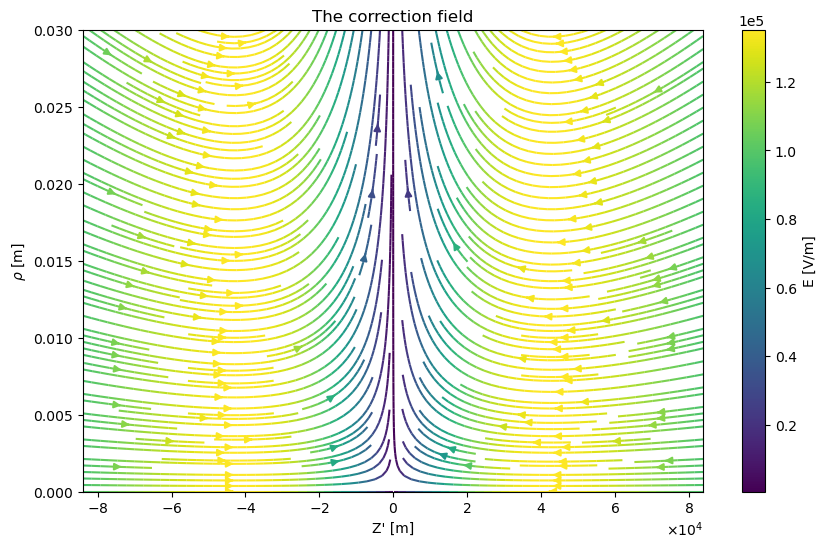

In [15]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(10, 6))
plt.streamplot(Z_res,Rho_res, -E_z_rest, -E_rho_rest, density=2.4, color = np.sqrt(E_z_rest**2+E_rho_rest**2))
cbar = plt.colorbar()
cbar.ax.set_ylabel('E [V/m]')
cbar.formatter.set_powerlimits((3, 1))
plt.ylim(0, R)
plt.xlabel("Z' [m]")
plt.ylabel("$\\rho$ [m]")
plt.title("The correction field")

mf = ScalarFormatter(useMathText=True)
mf.set_powerlimits((5,1))
plt.gca().xaxis.set_major_formatter(mf)

/tmp/ipykernel_15830/346675848.py:26: RuntimeWarning: overflow encountered in exp
  E = np.sqrt(np.pi/2)*special.erf(Rin/sigma/1.414213562) - Rin/sigma/np.exp(Rin**2/sigma/sigma/2)


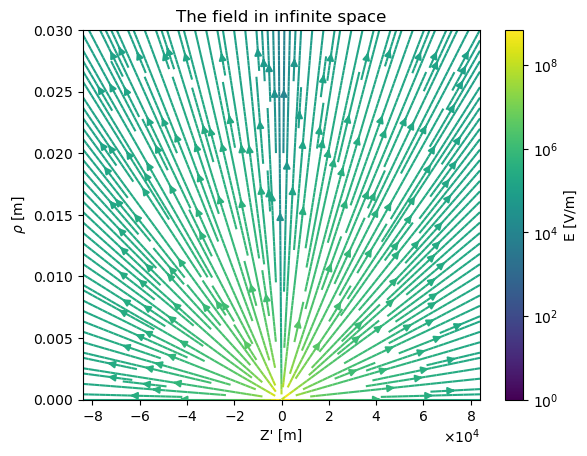

In [16]:
import matplotlib.colors as colors

E_rho_beam, E_z_beam = getE(Rho_res, Z_res)
colors_arr = np.sqrt(E_rho_beam**2+E_z_beam**2)
plt.streamplot(Z_res,Rho_res, E_z_beam, E_rho_beam, density=2.4, color = colors_arr, norm=colors.LogNorm(vmin=1, vmax=7E8))
cbar = plt.colorbar()
cbar.ax.set_ylabel('E [V/m]')
plt.ylim(0, R)
plt.xlabel("Z' [m]")
plt.ylabel("$\\rho$ [m]")
plt.title("The field in infinite space")

mf = ScalarFormatter(useMathText=True)
mf.set_powerlimits((5,1))
plt.gca().xaxis.set_major_formatter(mf)

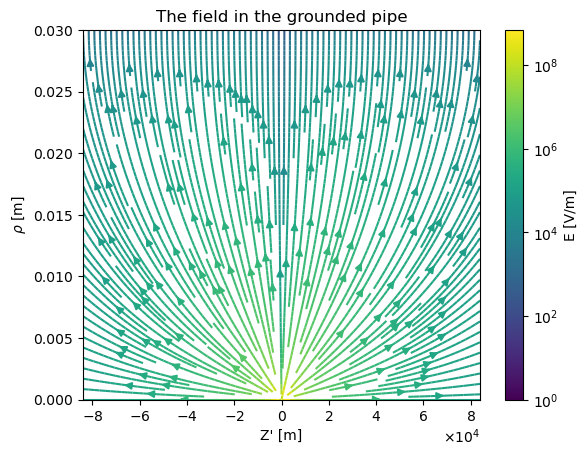

In [17]:
E_rho_final = E_rho_beam - E_rho_rest
E_z_final = E_z_beam - E_z_rest

colors_arr = np.sqrt(E_rho_final**2+E_z_final**2)
plt.streamplot(Z_res, Rho_res, E_z_final, E_rho_final, density=2.4, color = colors_arr, norm=colors.LogNorm(vmin=1, vmax=7E8))
cbar = plt.colorbar()
cbar.ax.set_ylabel('E [V/m]')
plt.ylim(0, R)
plt.xlabel("Z' [m]")
plt.ylabel("$\\rho$ [m]")
plt.title("The field in the grounded pipe")

mf = ScalarFormatter(useMathText=True)
mf.set_powerlimits((5,1))
plt.gca().xaxis.set_major_formatter(mf)

In [18]:
# np.savetxt('Z_res.txt', Z_res)
# np.savetxt('Rho_res.txt', Rho_res)
# np.savetxt('E_z_final.txt', E_z_final)
# np.savetxt('E_rho_final.txt', E_rho_final) 

In [22]:
bunchFieldFile = open("Proton bunch field map.csv", "w")

bunchFieldFile.write("r [m],z [m],Er [m],Ez [m]\n")

for i in range(E_z_final.shape[0]):
    for j in range(E_z_final.shape[1]):
       bunchFieldFile.write(f"{Rho_res[i,j]},{Z_res[i,j]},{E_rho_final[i][j]},{E_z_final[i][j]}\n")

bunchFieldFile.close()